# Data Story

Data: All data was collected using the <a href="https://github.com/BurntSushi/nflgame">nflgame</a> Python Module. The data is sorced from NFL.com's api. Using nflgame you are able to collect all individual NFL player's statistics on a game by game basis. The data I collected starts in 2011 and goes up to current season. 

The data is basically seperated into two table. Players and Games. For my purposes I needed to combine certain stats both tables. My methodology and code for this can be found <a href="https://github.com/schultztimothy/SpringBoard/blob/master/NFL%20Data%20Wrangling.ipynb" target=_'blank'>here</a>.

# Goal
The goal of my analysis will be to predict which players will make up the strongest Fantasy Footbal team each week. For those not familiar with Fantasy Football and its rules they can be found <a href="https://www.fanduel.com/rules"> here</a>. The basic idea is that you pick 8 offense players from any team within the nfl. You also pick one team's defense which is scored similar to a player. 

# Initial Hypothesis

For this exercise I will also consider the following:
1. Which players have the strongest performances in games leading up the current week
2. How well a given player has performed when they were playing at their home stadium vs. the opponent's stadium.
3. How a given player has performed over an entire season. 
4. Identify the strongest defenses
5. Test how well a strong offensive player performs against a strong/week defense


# The Data

In [1]:
import nflgame as nfl 
import pandas as pd 
import nflgame.game as game
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# QB Fantasy Points
The quarter back is one of the most important players when it comes to Fantasy Football. Above I calculated each players Fantasy Score based on FanDuel's scoring equation.  Below I charted the history of each players Fantasy Points Per Game(FPPG). With over 50 QB's in the NFL I chose the top eight QB's based on previous scores.

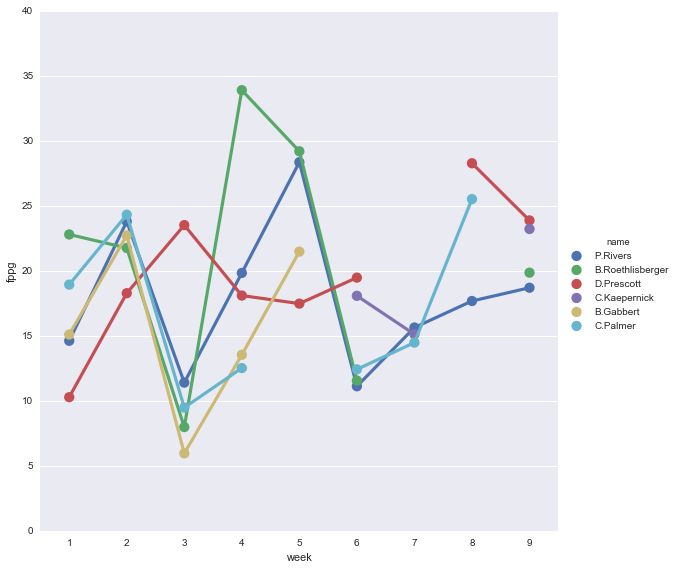

In [9]:
plyrs = ['P.Rivers', 'C.Palmer', 'B.Roethlisberger', 'D.Prescott', 'C.Kaepernick', 'R.Tann', 'C.Palmer', 'B.Gabbert']
qbfppg16 = qbfppg[qbfppg['name'].isin(plyrs)]
qbfppg16 = qbfppg16[['name', 'week', 'fppg', 'season']]
qbfppg16 = qbfppg16[qbfppg16.season == 16]
qbfppg16.sort_values('season', inplace=True)
chart = sns.factorplot(data = qbfppg16, x = 'week', y = 'fppg', hue = 'name', size = 8)

# 2015 Stats for same players

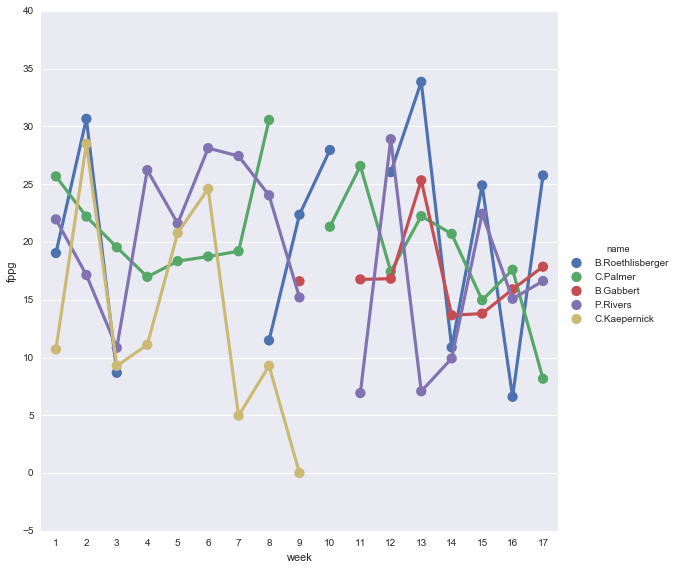

In [12]:
#2015 Same 
plyrs = ['P.Rivers', 'C.Palmer', 'B.Roethlisberger', 'D.Prescott', 'C.Kaepernick', 'R.Tann', 'C.Palmer', 'B.Gabbert']
qbfppg15 = qbfppg[qbfppg['name'].isin(plyrs)]
#qbfppg15 = qbfppg15[['name', 'week', 'fppg', 'season']]
qbfppg15 = qbfppg15[qbfppg15.season == 15]
qbfppg15.sort_values('season', inplace=True)
chart = sns.factorplot(data = qbfppg15, x = 'week', y = 'fppg', hue = 'name', size = 8)

# Home vs. Away FPPG

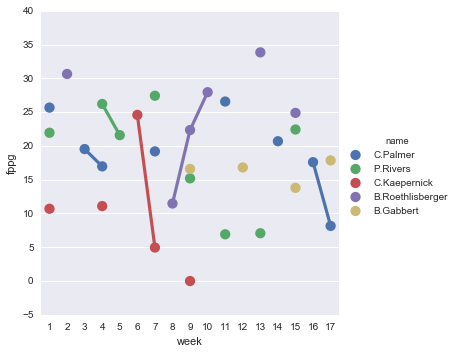

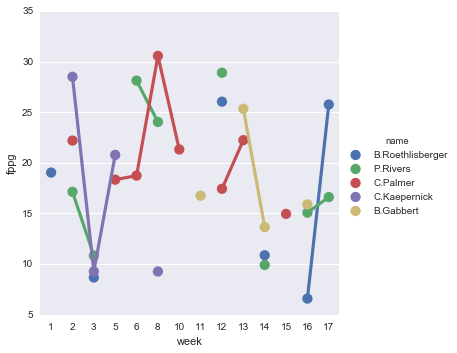

In [17]:

plyrs = ['P.Rivers', 'C.Palmer', 'B.Roethlisberger', 'D.Prescott', 'C.Kaepernick', 'R.Tann', 'C.Palmer', 'B.Gabbert']
qbfppg15 = qbfppg[qbfppg['name'].isin(plyrs)]
qbfppg15 = qbfppg15[qbfppg15.season == 15]
qbfppg15h = qbfppg15[qbfppg15.home == qbfppg15.team]
qbfppg15a = qbfppg15[qbfppg15.home != qbfppg15.team]
chart = sns.factorplot(data = qbfppg15h, x = 'week', y = 'fppg', hue = 'name', size = 5)
chart = sns.factorplot(data = qbfppg15a, x = 'week', y = 'fppg', hue = 'name', size = 5)

# Home vs. Away
The Factor Plot above does not do the best job of identifying the difference between performance when playing at home vs away. As you can see below I did a quick analysis of the Manning brothers. Eli seems to be perform noticably better while at home, while Peyton has much more of a normal distribution.

(array([ 0.06094918,  0.02031639,  0.04063279,  0.06094918,  0.06094918,
         0.08126558,  0.06094918,  0.08126558,  0.04063279,  0.        ,
         0.06094918,  0.02031639,  0.06094918,  0.06094918,  0.        ,
         0.        ,  0.04063279,  0.02031639,  0.        ,  0.02031639,
         0.04063279,  0.        ,  0.        ,  0.        ,  0.02031639,
         0.02031639,  0.        ,  0.        ,  0.        ,  0.02031639]),
 array([  4.44      ,   5.55866667,   6.67733333,   7.796     ,
          8.91466667,  10.03333333,  11.152     ,  12.27066667,
         13.38933333,  14.508     ,  15.62666667,  16.74533333,
         17.864     ,  18.98266667,  20.10133333,  21.22      ,
         22.33866667,  23.45733333,  24.576     ,  25.69466667,
         26.81333333,  27.932     ,  29.05066667,  30.16933333,
         31.288     ,  32.40666667,  33.52533333,  34.644     ,
         35.76266667,  36.88133333,  38.        ]),
 <a list of 30 Patch objects>)

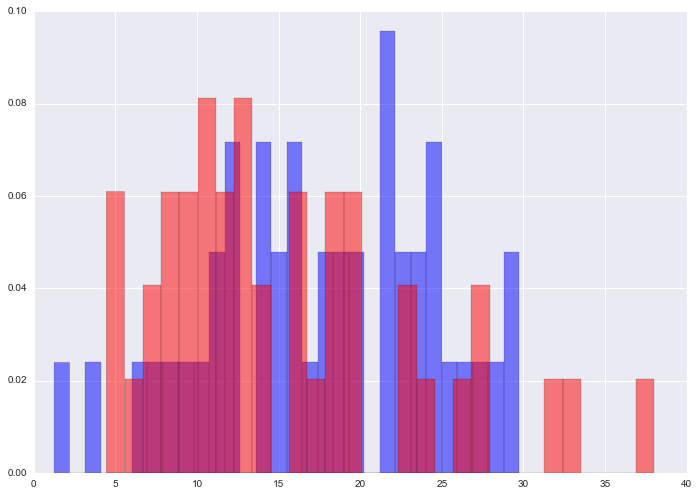

In [22]:
plyr = qbfppg[qbfppg.name=='E.Manning']
plyrh = plyr[plyr.home==plyr.team]
plyra = plyr[plyr.home!=plyr.team]
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.hist(plyrh.fppg,normed=True,color='blue',alpha=0.5,bins=30)
plt.hist(plyra.fppg,normed=True,color='red',alpha=0.5,bins=30)

(array([ 0.03678815,  0.        ,  0.03678815,  0.03678815,  0.1471526 ,
         0.        ,  0.0735763 ,  0.        ,  0.03678815,  0.0735763 ,
         0.03678815,  0.03678815,  0.03678815,  0.1471526 ,  0.        ,
         0.03678815,  0.03678815,  0.03678815,  0.        ,  0.0735763 ,
         0.        ,  0.03678815,  0.        ,  0.        ,  0.0735763 ,
         0.        ,  0.03678815,  0.        ,  0.        ,  0.03678815]),
 array([  8.64      ,   9.57733333,  10.51466667,  11.452     ,
         12.38933333,  13.32666667,  14.264     ,  15.20133333,
         16.13866667,  17.076     ,  18.01333333,  18.95066667,
         19.888     ,  20.82533333,  21.76266667,  22.7       ,
         23.63733333,  24.57466667,  25.512     ,  26.44933333,
         27.38666667,  28.324     ,  29.26133333,  30.19866667,
         31.136     ,  32.07333333,  33.01066667,  33.948     ,
         34.88533333,  35.82266667,  36.76      ]),
 <a list of 30 Patch objects>)

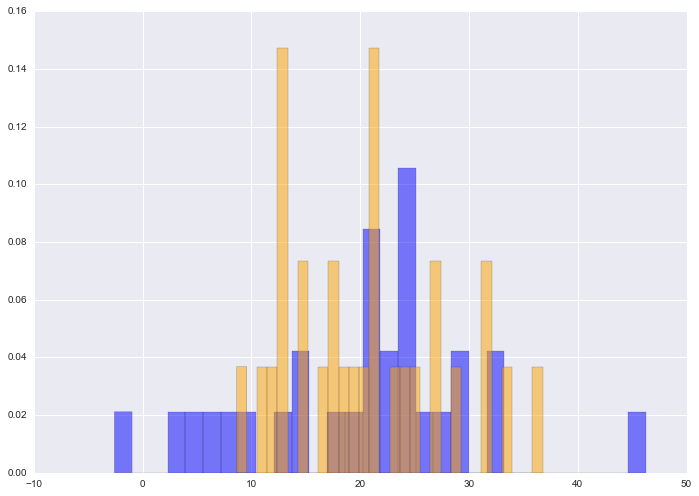

In [23]:
plyr = qbfppg[qbfppg.name=='P.Manning']
plyrh = plyr[plyr.home==plyr.team]
plyra = plyr[plyr.home!=plyr.team]
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.hist(plyrh.fppg,normed=True,color='blue',alpha=0.5,bins=30)
plt.hist(plyra.fppg,normed=True,color='orange',alpha=0.5,bins=30)

## Alternative Method
During this process I found a <a href="http://datashoptalk.com/double-yo-money/" target="_blank">study</a> that has a very similar goal, but approaches it differently. 

In Troy Ruths' approach he utilizes one of the many websites that predicts fantasy football scores. He then compares those predictions to the Salaries that each player is given within FanDuel. Finally he uses a "knapsack" algorithm to generate the optimal lineup for each week.

I plan to use this study as a comparison while completeing my project. Below I plotted the correlation between <a href="https://www.fantasypros.com/" target="_blank">fantasypros.com</a> weekly predictions and FanDuel's Salaries.


In [24]:
from lxml import html
import requests

Scrape fantasypros.com

In [28]:
qburl = 'https://www.fantasypros.com/nfl/rankings/qb.php'
plyr = requests.get(qburl)
plyr = html.fromstring(plyr.content)
qbrnks = pd.DataFrame()
playr = []
rank = []
for p in plyr.xpath('//td[@class="player-label"]/a[1]'):
    playr.append(p.text)

for r in plyr.xpath('//div[@class="mobile-table"]/table/tbody/tr[@class!="table-ad"]/td[1]'):
    rank.append(r.text)
qbrnks['rank'] = rank
qbrnks['name'] = playr


Create Salaries DF from csv file downloaded from Fanduel

In [31]:
slrs = pd.read_csv('FanDuel-NFL-2016-11-20-16939-players-list.csv')
slrs['name'] = slrs['First Name'] + ' ' + slrs['Last Name']
slrs = slrs[['name', 'Salary']]

In [49]:
qb = pd.merge(qbrnks, slrs, on='name', how='inner')
qb['rank'] = qb['rank'].astype(float)
qb.head()

,rank,name,Salary
0,1.0,Tom Brady,9300
1,4.0,Aaron Rodgers,9100
2,5.0,Ben Roethlisberger,8400
3,6.0,Marcus Mariota,8000
4,7.0,Andrew Luck,8100


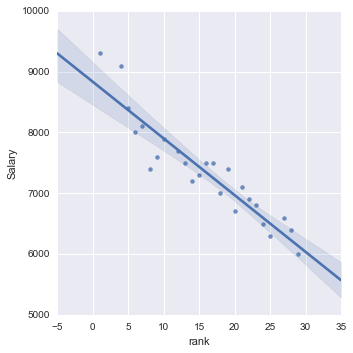

In [50]:
sns.lmplot("rank", "Salary", qb)

In [51]:
qb[['rank', 'Salary']].corr()

,rank,Salary
rank,1.000000,-0.929995
Salary,-0.929995,1.000000
